# Как читать графики машинного обучения: Подробное руководство

В этом руководстве мы разберем, как правильно читать и интерпретировать
графики для метрик ROC-AUC, PR-AUC и R-squared с практическими примерами.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

# 1. КАК ЧИТАТЬ ROC КРИВУЮ

In [3]:
from sklearn.dummy import DummyClassifier

print("\n🎯 1. ROC КРИВАЯ (Receiver Operating Characteristic)")
print("-" * 50)

# Создаем данные для демонстрации
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, 
                          n_redundant=2, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучаем разные модели для сравнения
good_model = RandomForestClassifier(n_estimators=100, random_state=42)
poor_model = DummyClassifier(strategy="stratified", random_state=42)  # Слабая модель чуть лучше случайной

good_model.fit(X_train, y_train)
poor_model.fit(X_train, y_train)

# Получаем предсказания
good_proba = good_model.predict_proba(X_test)[:, 1]
poor_proba = poor_model.predict_proba(X_test)[:, 1]

# Вычисляем ROC кривые
good_fpr, good_tpr, _ = roc_curve(y_test, good_proba)
poor_fpr, poor_tpr, _ = roc_curve(y_test, poor_proba)

good_auc = auc(good_fpr, good_tpr)
poor_auc = auc(poor_fpr, poor_tpr)


🎯 1. ROC КРИВАЯ (Receiver Operating Characteristic)
--------------------------------------------------


## График 1: Основная ROC кривая с объяснениями

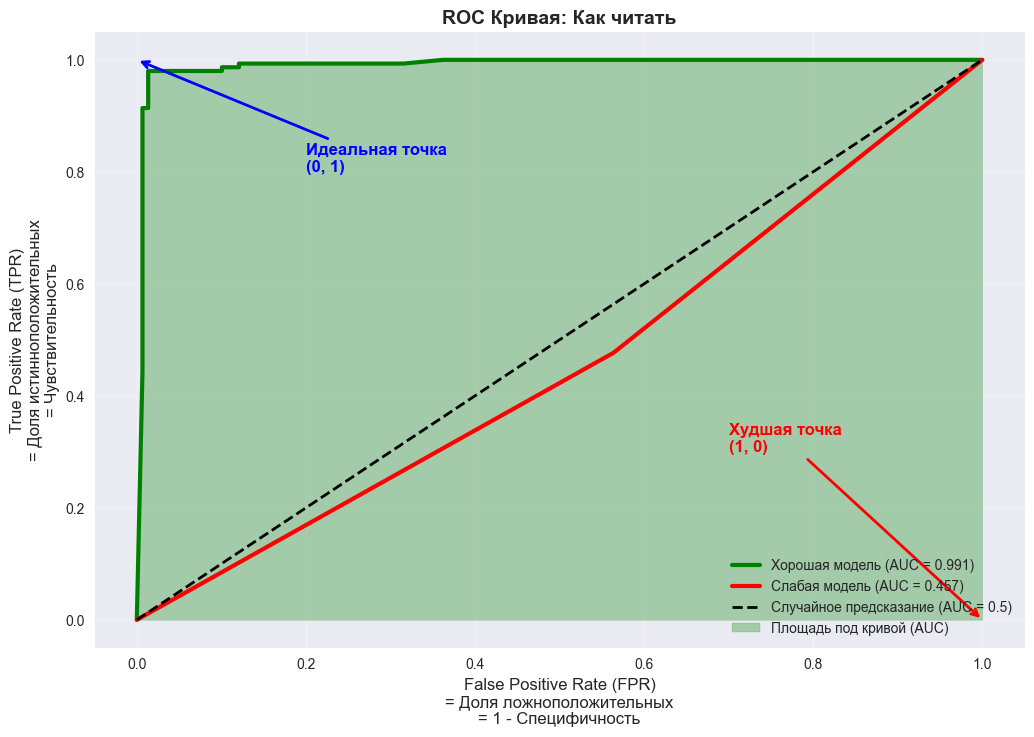

📖 КАК ЧИТАТЬ ROC КРИВУЮ:
• Ось X (FPR): Доля неправильно классифицированных отрицательных примеров
• Ось Y (TPR): Доля правильно классифицированных положительных примеров
• Диагональная линия: Случайное предсказание
• Чем левее и выше кривая, тем лучше модель
• AUC = площадь под кривой (от 0 до 1)


In [4]:
plt.figure(figsize=(12, 8))
plt.plot(good_fpr, good_tpr, linewidth=3, label=f'Хорошая модель (AUC = {good_auc:.3f})', color='green')
plt.plot(poor_fpr, poor_tpr, linewidth=3, label=f'Слабая модель (AUC = {poor_auc:.3f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Случайное предсказание (AUC = 0.5)')

# Добавляем аннотации для объяснения
plt.annotate('Идеальная точка\n(0, 1)', xy=(0, 1), xytext=(0.2, 0.8),
             arrowprops=dict(arrowstyle='->', color='blue', lw=2),
             fontsize=12, color='blue', weight='bold')

plt.annotate('Худшая точка\n(1, 0)', xy=(1, 0), xytext=(0.7, 0.3),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=12, color='red', weight='bold')

plt.fill_between(good_fpr, good_tpr, alpha=0.3, color='green', label='Площадь под кривой (AUC)')

plt.xlabel('False Positive Rate (FPR)\n= Доля ложноположительных\n= 1 - Специфичность', fontsize=12)
plt.ylabel('True Positive Rate (TPR)\n= Доля истинноположительных\n= Чувствительность', fontsize=12)
plt.title('ROC Кривая: Как читать', fontsize=14, weight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

print("📖 КАК ЧИТАТЬ ROC КРИВУЮ:")
print("• Ось X (FPR): Доля неправильно классифицированных отрицательных примеров")
print("• Ось Y (TPR): Доля правильно классифицированных положительных примеров")
print("• Диагональная линия: Случайное предсказание")
print("• Чем левее и выше кривая, тем лучше модель")
print("• AUC = площадь под кривой (от 0 до 1)")

## График 2: Что означают разные формы ROC кривых

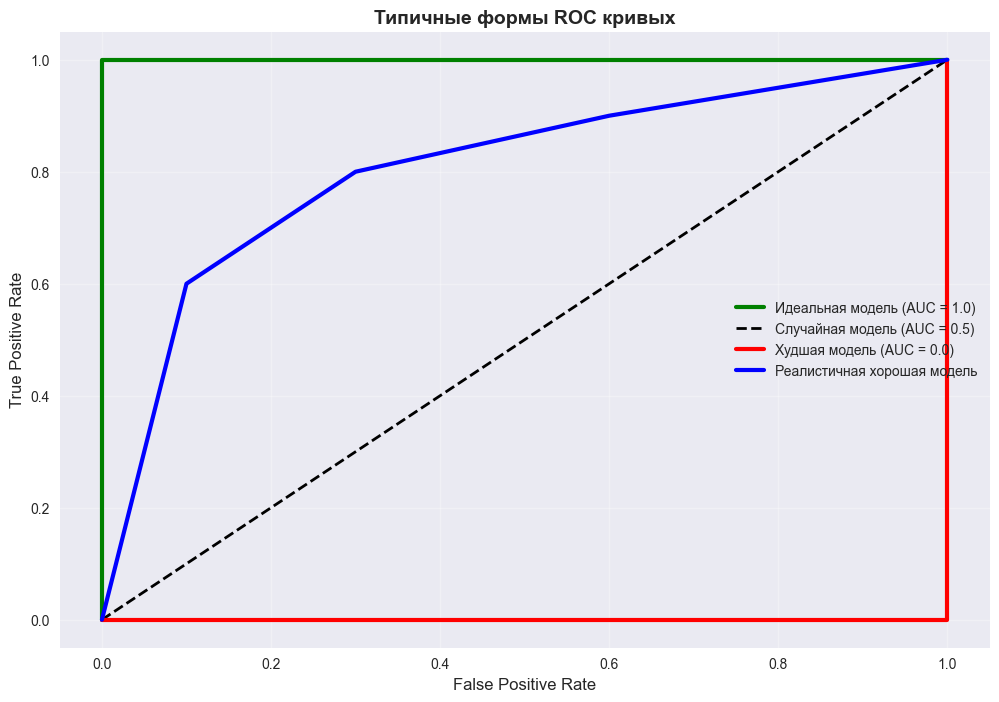


🎯 ИНТЕРПРЕТАЦИЯ ФОРМ ROC КРИВЫХ:
• Прямоугольная (идеальная): Сначала растет вертикально, потом горизонтально
• Выпуклая вверх: Хорошая модель, быстро находит положительные примеры
• Диагональная: Случайное предсказание, модель не работает
• Вогнутая вниз: Плохая модель, но можно инвертировать предсказания


In [5]:
plt.figure(figsize=(12, 8))
plt.plot([0, 0, 1], [0, 1, 1], 'g-', linewidth=3, label='Идеальная модель (AUC = 1.0)')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Случайная модель (AUC = 0.5)')
plt.plot([0, 1, 1], [0, 0, 1], 'r-', linewidth=3, label='Худшая модель (AUC = 0.0)')

# Добавляем примеры реальных кривых
realistic_fpr = np.array([0, 0.1, 0.3, 0.6, 1.0])
realistic_tpr = np.array([0, 0.6, 0.8, 0.9, 1.0])
plt.plot(realistic_fpr, realistic_tpr, 'b-', linewidth=3, label='Реалистичная хорошая модель')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Типичные формы ROC кривых', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n🎯 ИНТЕРПРЕТАЦИЯ ФОРМ ROC КРИВЫХ:")
print("• Прямоугольная (идеальная): Сначала растет вертикально, потом горизонтально")
print("• Выпуклая вверх: Хорошая модель, быстро находит положительные примеры")
print("• Диагональная: Случайное предсказание, модель не работает")
print("• Вогнутая вниз: Плохая модель, но можно инвертировать предсказания")

# 2. КАК ЧИТАТЬ PR КРИВУЮ

In [6]:
# Создаем несбалансированный датасет
X_imb, y_imb = make_classification(n_samples=1000, n_features=10, n_informative=5,
                                  weights=[0.9, 0.1], random_state=42)
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.3, random_state=42)

# Обучаем модели
good_model_imb = RandomForestClassifier(n_estimators=100, random_state=42)
poor_model_imb = LogisticRegression(C=0.01, random_state=42)

good_model_imb.fit(X_train_imb, y_train_imb)
poor_model_imb.fit(X_train_imb, y_train_imb)

good_proba_imb = good_model_imb.predict_proba(X_test_imb)[:, 1]
poor_proba_imb = poor_model_imb.predict_proba(X_test_imb)[:, 1]

# Вычисляем PR кривые
good_precision, good_recall, _ = precision_recall_curve(y_test_imb, good_proba_imb)
poor_precision, poor_recall, _ = precision_recall_curve(y_test_imb, poor_proba_imb)

good_pr_auc = average_precision_score(y_test_imb, good_proba_imb)
poor_pr_auc = average_precision_score(y_test_imb, poor_proba_imb)

baseline = y_test_imb.mean()

## График 3: PR кривая с объяснениями

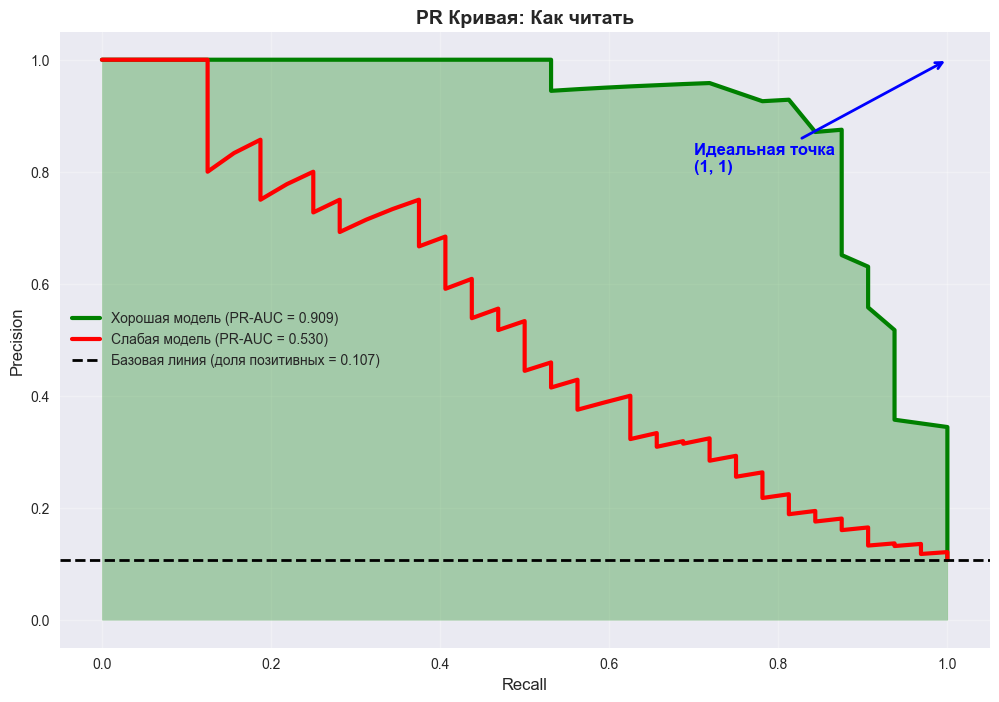

📖 КАК ЧИТАТЬ PR КРИВУЮ:
• Ось X (Recall): Какую долю всех положительных примеров мы нашли
• Ось Y (Precision): Какая доля наших положительных предсказаний верна
• Базовая линия: Доля положительных примеров в данных. Это минимальная планка, которую должна превзойти модель!
• Чем правее и выше кривая, тем лучше модель
• Особенно важна для несбалансированных данных


In [7]:
plt.figure(figsize=(12, 8))
plt.plot(good_recall, good_precision, linewidth=3, 
         label=f'Хорошая модель (PR-AUC = {good_pr_auc:.3f})', color='green')
plt.plot(poor_recall, poor_precision, linewidth=3,
         label=f'Слабая модель (PR-AUC = {poor_pr_auc:.3f})', color='red')
plt.axhline(y=baseline, color='k', linestyle='--', linewidth=2,
            label=f'Базовая линия (доля позитивных = {baseline:.3f})')

# Заполняем область под кривой
plt.fill_between(good_recall, good_precision, alpha=0.3, color='green')

# Добавляем аннотации
plt.annotate('Идеальная точка\n(1, 1)', xy=(1, 1), xytext=(0.7, 0.8),
             arrowprops=dict(arrowstyle='->', color='blue', lw=2),
             fontsize=12, color='blue', weight='bold')

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('PR Кривая: Как читать', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("📖 КАК ЧИТАТЬ PR КРИВУЮ:")
print("• Ось X (Recall): Какую долю всех положительных примеров мы нашли")
print("• Ось Y (Precision): Какая доля наших положительных предсказаний верна")
print("• Базовая линия: Доля положительных примеров в данных. Это минимальная планка, которую должна превзойти модель!")
print("• Чем правее и выше кривая, тем лучше модель")
print("• Особенно важна для несбалансированных данных")

# 3. КАК ЧИТАТЬ ГРАФИКИ РЕГРЕССИИ

In [8]:
# Создаем данные для регрессии
np.random.seed(42)
n_samples = 300
X_reg = np.random.randn(n_samples, 1)
y_perfect = 2 * X_reg.ravel() + 1  # Идеальная линейная зависимость
y_good = y_perfect + np.random.randn(n_samples) * 0.5  # С небольшим шумом
y_poor = y_perfect + np.random.randn(n_samples) * 2    # С большим шумом

## График 4: Predicted vs Actual для разных R²

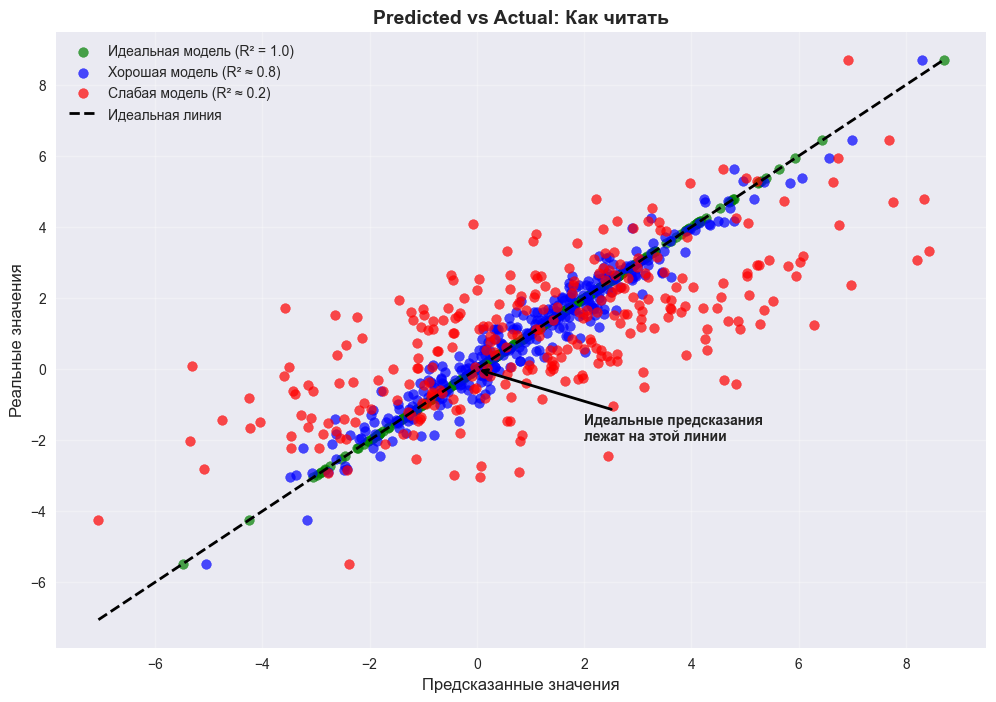

📖 КАК ЧИТАТЬ PREDICTED VS ACTUAL:
• Каждая точка = одно наблюдение
• Ось X: Что предсказала модель
• Ось Y: Реальное значение
• Диагональная линия: Идеальные предсказания
• Чем ближе точки к диагонали, тем лучше модель
• Разброс точек показывает ошибки модели


In [9]:
plt.figure(figsize=(12, 8))
plt.scatter(y_perfect, y_perfect, alpha=0.7, label='Идеальная модель (R² = 1.0)', color='green')
plt.scatter(y_good, y_perfect, alpha=0.7, label='Хорошая модель (R² ≈ 0.8)', color='blue')
plt.scatter(y_poor, y_perfect, alpha=0.7, label='Слабая модель (R² ≈ 0.2)', color='red')

# Добавляем идеальную линию
min_val = min(y_poor.min(), y_perfect.min())
max_val = max(y_poor.max(), y_perfect.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label='Идеальная линия')

plt.xlabel('Предсказанные значения', fontsize=12)
plt.ylabel('Реальные значения', fontsize=12)
plt.title('Predicted vs Actual: Как читать', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем аннотации
plt.annotate('Идеальные предсказания\nлежат на этой линии', 
             xy=(0, 0), xytext=(2, -2),
             arrowprops=dict(arrowstyle='->', color='black', lw=2),
             fontsize=10, weight='bold')
plt.show()

print("📖 КАК ЧИТАТЬ PREDICTED VS ACTUAL:")
print("• Каждая точка = одно наблюдение")
print("• Ось X: Что предсказала модель")
print("• Ось Y: Реальное значение")
print("• Диагональная линия: Идеальные предсказания")
print("• Чем ближе точки к диагонали, тем лучше модель")
print("• Разброс точек показывает ошибки модели")

## График 5: Анализ остатков

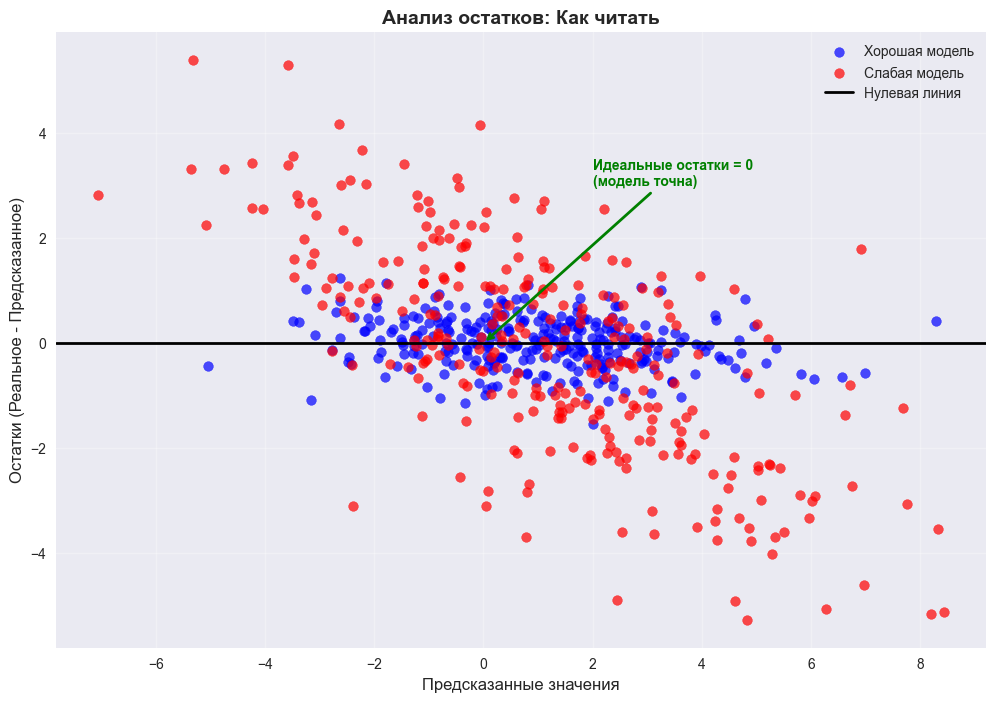


📖 КАК ЧИТАТЬ ГРАФИК ОСТАТКОВ:
• Остаток = Реальное значение - Предсказанное значение
• Ось X: Предсказанные значения
• Ось Y: Остатки (ошибки)
• Нулевая линия: Идеальные предсказания
• Случайный разброс вокруг нуля = хорошая модель
• Паттерны в остатках = проблемы с моделью


In [10]:
residuals_good = y_perfect - y_good
residuals_poor = y_perfect - y_poor

plt.figure(figsize=(12, 8))
plt.scatter(y_good, residuals_good, alpha=0.7, color='blue', label='Хорошая модель')
plt.scatter(y_poor, residuals_poor, alpha=0.7, color='red', label='Слабая модель')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Нулевая линия')

plt.xlabel('Предсказанные значения', fontsize=12)
plt.ylabel('Остатки (Реальное - Предсказанное)', fontsize=12)
plt.title('Анализ остатков: Как читать', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем аннотации для остатков
plt.annotate('Идеальные остатки = 0\n(модель точна)', 
             xy=(0, 0), xytext=(2, 3),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=10, color='green', weight='bold')
plt.show()

print("\n📖 КАК ЧИТАТЬ ГРАФИК ОСТАТКОВ:")
print("• Остаток = Реальное значение - Предсказанное значение")
print("• Ось X: Предсказанные значения")
print("• Ось Y: Остатки (ошибки)")
print("• Нулевая линия: Идеальные предсказания")
print("• Случайный разброс вокруг нуля = хорошая модель")
print("• Паттерны в остатках = проблемы с моделью")

## График 6: Демонстрация разных значений R²

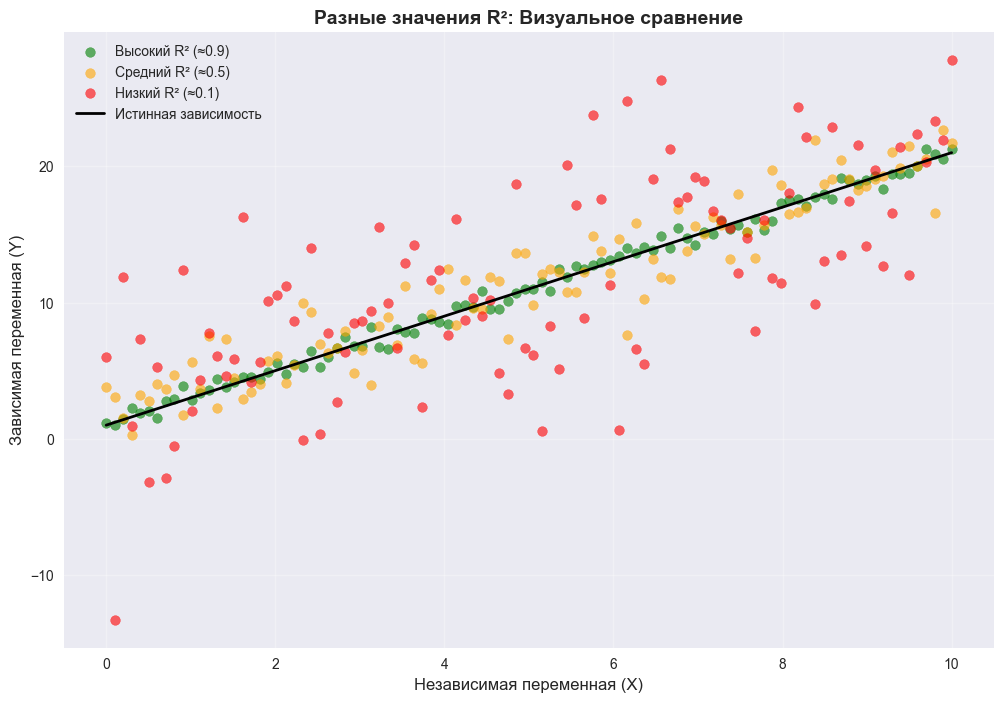


📖 КАК ВИЗУАЛЬНО ОЦЕНИТЬ R²:
• R² близко к 1: Точки тесно группируются вокруг линии тренда
• R² около 0.5: Заметный разброс, но тенденция видна
• R² близко к 0: Сильный разброс, связь почти не видна


In [11]:
x_demo = np.linspace(0, 10, 100)
y_r2_high = 2*x_demo + 1 + np.random.randn(100) * 0.5  # R² ≈ 0.9
y_r2_med = 2*x_demo + 1 + np.random.randn(100) * 2     # R² ≈ 0.5
y_r2_low = 2*x_demo + 1 + np.random.randn(100) * 5     # R² ≈ 0.1

plt.figure(figsize=(12, 8))
plt.scatter(x_demo, y_r2_high, alpha=0.6, label='Высокий R² (≈0.9)', color='green')
plt.scatter(x_demo, y_r2_med, alpha=0.6, label='Средний R² (≈0.5)', color='orange')
plt.scatter(x_demo, y_r2_low, alpha=0.6, label='Низкий R² (≈0.1)', color='red')
plt.plot(x_demo, 2*x_demo + 1, 'k-', linewidth=2, label='Истинная зависимость')

plt.xlabel('Независимая переменная (X)', fontsize=12)
plt.ylabel('Зависимая переменная (Y)', fontsize=12)
plt.title('Разные значения R²: Визуальное сравнение', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n📖 КАК ВИЗУАЛЬНО ОЦЕНИТЬ R²:")
print("• R² близко к 1: Точки тесно группируются вокруг линии тренда")
print("• R² около 0.5: Заметный разброс, но тенденция видна")
print("• R² близко к 0: Сильный разброс, связь почти не видна")
